# Homework 4

##### October 8, 2020

##### (1) Describe these data: graphs, descriptors and interpretation.Please use R.   The data are from an unpublished study in which therapists were encouraged to administer a new PTSD test to troubled children.  The numbers are the number of tests administered.  There were two groups: an experimental group who received focused training on the need to consider PTSD in troubled children and a control group without special training on the importance of PTSD. What theoretical distribution might be appropriate for these data?

In [3]:
dat = read.csv('data_files/hw4_q1.csv')

In [4]:
colnames(dat) = c('experiment', 'control')

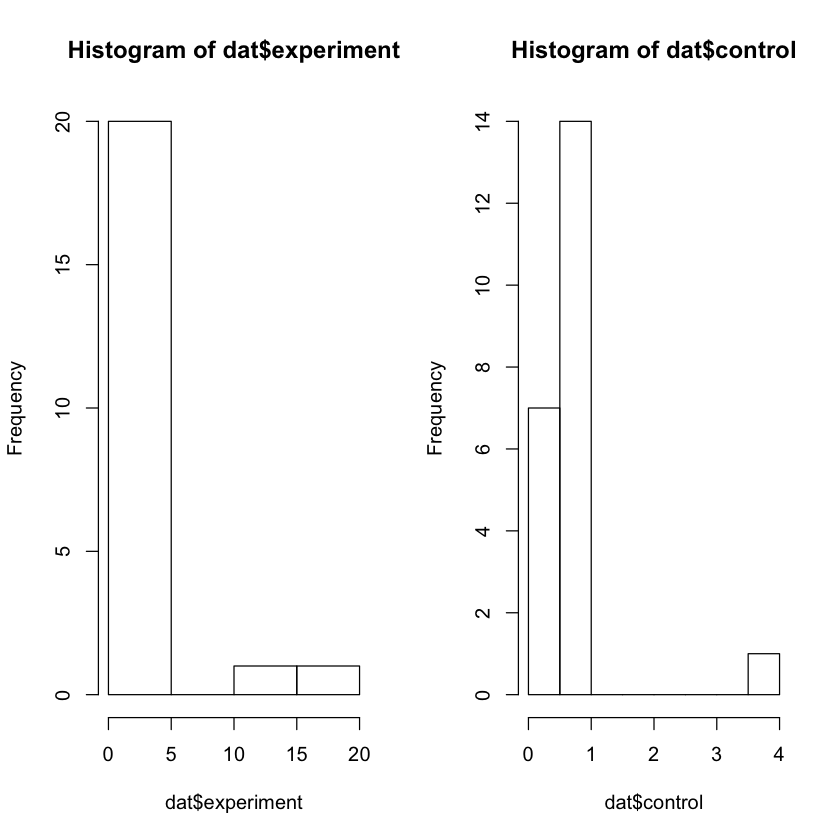

In [5]:
par(mfrow=c(1,2))
hist(dat$experiment)
hist(dat$control)

In [26]:
    summary(dat$experiment)
    var(dat$experiment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     1.0     1.0     2.5     2.0    17.0 

[1] 17.11905

In [25]:
summary(dat$control)
var(dat$control)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.8182  1.0000  4.0000 

[1] 0.7272727

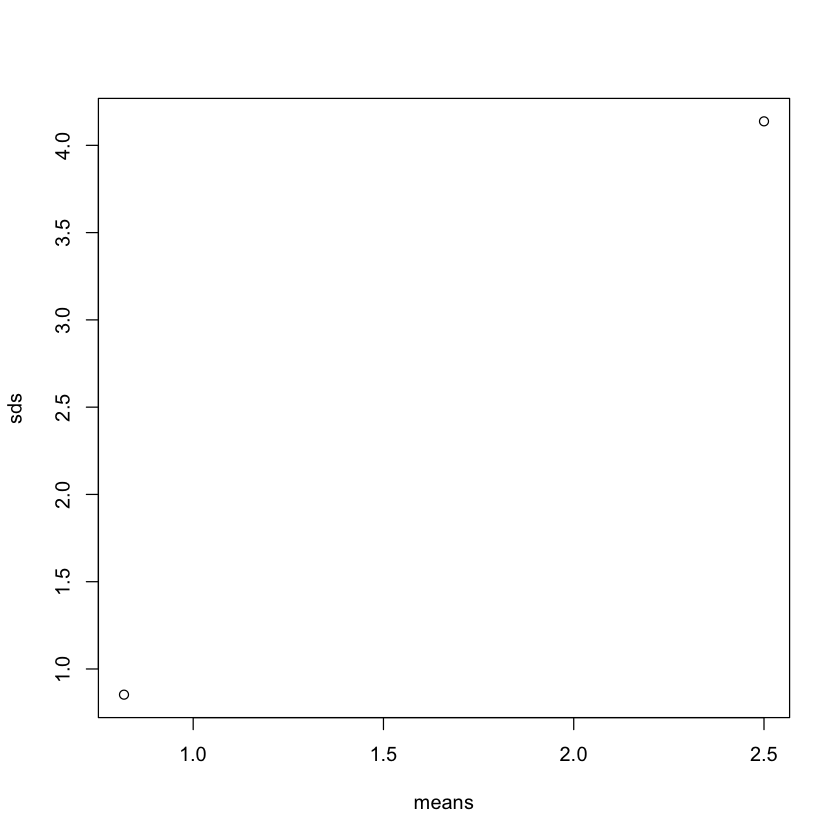

In [24]:
means = c(mean(dat$experiment), mean(dat$control))
sds = c(sd(dat$experiment), sd(dat$control))
plot(means, sds)

The experimental and control groups are similar in the fact that the vast majority of providers administered 5 or fewer tests. However, the control group has a maximum of 4 tests per provider, and the experimental group has two providers with 12 and 17 tests. This negatively skews the experimental data and raises its avereage to 2.5, whereas the average number of tests for the control group is 0.8182. Their medians are both, which may be a better measure of central tendancy given the skewness. Also, there seems to be a relationship between the standard deviation and the means of these samples. Therefore, a gamma distribution (perhaps chi-squared distribution) might fit these data well given its high probability density at low values of X.

###### (2) Using the probability mass function (p(x) = (2x)/k { for x = 1,2,3,4,5 and 0 otherwise} from an earlier homework find the find the mean and variance of the distribution and the mean and variance from the sampling distribution of means for samples of size 16 from the same probability mass function.

In [46]:
# From HW2 K = 30
# get probabilities for each value in distribution
iter = c(1:5)
for (i in iter) {
    iter[i] = (2*i)/30
}
print(paste('Probabilities of each value: ',iter))

# multiply values by their probabilities
dist = c(1:5)* iter

#mean is the sum of each value times its probability
print(paste('mean of distribution: ',sum(dist)))

# variance is the sum of squared distance of each value from the mean times its probability
vals = rep(0,5)
for (val in c(1:5)){
    sqrd_d_from_mean = ((val - dist[val])^2) * iter[val]
    vals[val] = sqrd_d_from_mean
}
print(paste('variance of distribution: ', sum(vals)/5))

[1] "Probabilities of each value:  0.0666666666666667"
[2] "Probabilities of each value:  0.133333333333333" 
[3] "Probabilities of each value:  0.2"               
[4] "Probabilities of each value:  0.266666666666667" 
[5] "Probabilities of each value:  0.333333333333333" 
[1] "mean of distribution:  3.66666666666667"
[1] "variance of distribution:  1.52177777777778"


In [45]:
# sample 16 times from distribution and calculate mean and variance of sample
samp_means = rep(0,100)
samp_vars = rep(0,100)
n = 16

for (samp in 1:100){
    new_sample = (sample(c(1:5),n, prob = iter, replace = T))
    samp_means[samp] = mean(new_sample)
    samp_vars[samp] = var(new_sample) #(sd(new_sample)^2) / sqrt(n)
}
print(paste('mean of sample: ', mean(samp_means)))
print(paste('variance of sample: ', mean(samp_vars)))


[1] "mean of sample:  3.64125"
[1] "variance of sample:  1.59766666666667"


##### (3) In a certain sampling distribution of the mean based on samples of size N1, a sample mean of 100 corresponds to a Z value of 1.0. However, when samples of size N2 are taken, a sample mean of 100 corresponds to a Z value of 2.0. How large is N2 relative to N1?

$z_{i} = \frac{x_{i} - \mu}{s}$<br>
Note, means ($\mu$) and stds ($\sigma$) will be the same because both samples are from the same distribution. $s$ is the standard error

case 1:
$1.0 = \frac{100 - \mu}{s}$<br>

case 2:
$2.0 = \frac{100 - \mu}{s}$<br>

$s_1 = 100 - \mu$<br>
$2*s_2 = 100 - \mu$


$s_1 = 2*s_2$<br>
and $s = \frac{\sigma}{\sqrt{n}}$

Therefore,
$\frac{\sigma}{\sqrt{n_1}} = \frac{2 *\sigma}{\sqrt{n_2}}$

And, <br>
$2 * \sigma * \sqrt{n_1} = \sigma * \sqrt{n_2}$

$(2\sqrt{n_1}) = \sqrt{n_2}$<br>
Finally, <br>
$4n_1 = n_2$

Therefore N2 is 4 times the size of N1.

##### (4) If the GRE Quantitative for our applicant pool a mean of 650 and an sd of 60, what score do I need to be at the 90%tile? What have you assumed?

In [1]:
# to get value of 90th percentile
mean = 650
sd = 60
zval = qnorm(.9, mean, sd)
zval

[1] 726.8931

##### (5) (Silly, but slightly relevant to the current material) Cruisin' to Grandma's House
RAY: There was a young gal who had a few bad accidents. So, her grandmother decided to give her an unusual gift: a large sum of money with which she was to buy a brand-new safe car, like a Volvo. There was one condition, however. When she got the car, Grandma wanted to see it to make sure that she didn't take the money and go out and buy a Firebird.

TOM: Or a pearl necklace!

RAY: Exactly. So on the first available Saturday she decides to drive to Grandma's house, which is 120 miles away. Because she's not particularly eager to get there, she gets on the highway and sets the cruise control for 40 miles an hour. She drives 120 miles to Grandma's house. Her new car has a little computer that tells her that her average speed is 40 miles an hour. When she gets there, she shows Grandma the car and high tails it out of there; she's eager to get home because she wants to go to the tattoo parlor before it closes. She sets the cruise control for 60 miles an hour. She travels the same road and the same 120 miles. When she gets home, she does a little figuring. She says, "I drove 120 miles up, 120 miles back, or 240 miles. I drove 40 miles an hour up, and 60 miles an hour back, so my average speed was 50 miles an hour, and it should have taken me 4.8 hours. But it took me 5 hours!"

The question is how can that be?

The average of the two average speeds is not equal to the global average speed of the entire trip. To get this We would need to do 120 miles * (1 hr / 40 miles ) + 120 miles * (1 hr / 60 miles) = 3 hrs  + 2 hrs = 5 hours. 